## Author: Ashmal Vayani
## Advanced Level Task
### Task#01: Develop A Neural Network That Can Read Handwriting

In [1]:
#read the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the dataset from keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
#scaling the data
X_train = X_train/255
X_test  = X_test/255

In [5]:
# 0 are black points and numbered are pixel value
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

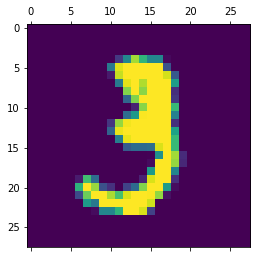

In [6]:
#displaying an image
plt.matshow(X_train[10])

In [7]:
#double check from train
y_train[10]

3

In [8]:
#We've to reshape 28x28 into single dimentional array having the image in 784.
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [9]:
X_train_flattened[10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Single Layer DNN

In [10]:
#Build a Single layer model and compile it
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4675 - accuracy: 0.8779
Epoch 2/20
1875/1875 [==============================] - 2s 959us/step - loss: 0.3034 - accuracy: 0.9163
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9256
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9272
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2576 - accuracy: 0.9280
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2548 - accuracy: 0.9289: 0s - loss: 0
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2532 - accuracy: 0.9297
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/st

In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2651 - accuracy: 0.9293


[0.26511019468307495, 0.9293000102043152]

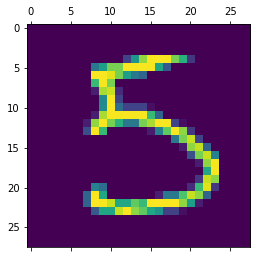

In [12]:
plt.matshow(X_test[15])

In [13]:
y_pred = model.predict(X_test_flattened)
y_pred[15]

array([8.6408854e-03, 2.4694204e-04, 7.7262223e-03, 7.4386024e-01,
       3.7282705e-04, 9.7633672e-01, 1.2962222e-03, 8.1535143e-09,
       7.8576636e-01, 3.9957082e-05], dtype=float32)

In [14]:
np.argmax(y_pred[15])

5

In [15]:
#converting back to original values
y_pred_labels = [np.argmax(i) for i in y_pred ]
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

### Evaluation

In [16]:
matrix = tf.math.confusion_matrix(labels=y_test, predictions = y_pred_labels)
matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    1,    6,    3,    4,    1,    0],
       [   0, 1109,    5,    2,    0,    1,    3,    2,   13,    0],
       [   4,    8,  943,   12,    9,    4,    9,   10,   30,    3],
       [   3,    0,   22,  923,    2,   20,    1,   10,   23,    6],
       [   1,    1,    6,    3,  924,    0,    6,    5,   10,   26],
       [   7,    2,    5,   36,    9,  779,    9,    9,   33,    3],
       [  12,    3,   13,    1,    8,   19,  900,    1,    1,    0],
       [   1,    6,   25,    3,    5,    1,    0,  954,    2,   31],
       [   5,    7,    8,   21,    9,   19,    6,   10,  879,   10],
       [   7,    8,    2,    8,   26,    7,    0,   23,    9,  919]])>

Text(69.0, 0.5, 'Truth')

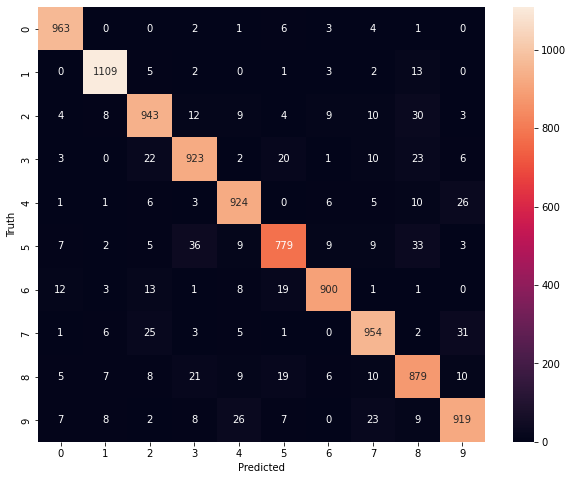

In [17]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

***The diagnol values shows that how many times the model predicted that value correctly***

## Double Layer DNN with different activation function

In [18]:
#Let's add one more layer and see if accuracy gets any better
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2741 - accuracy: 0.9220
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9631
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - accuracy: 0.9736
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9796
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9841
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9868
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0350 - accuracy: 0.9887
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

***The accuracy now has been upto 99.77% which makes our model absolutely very good***

In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 975us/step - loss: 0.1148 - accuracy: 0.9744


[0.1148073598742485, 0.974399983882904]

In [20]:
y_pred2 = model.predict(X_test_flattened)
y_pred2_labels = [np.argmax(i) for i in y_pred2 ]
matrix2 = tf.math.confusion_matrix(labels=y_test, predictions = y_pred2_labels)

Text(69.0, 0.5, 'Truth')

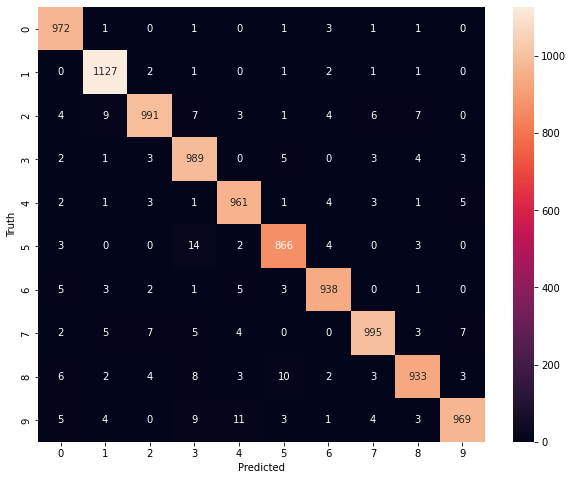

In [21]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(matrix2, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')